In [1]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Input,Activation,Flatten
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np

filters_per_conv_layer = [16,16,24]
neurons_per_dense_layer = [42,64]
batch_size=250

x = x_in = Input((15,15,1))

for i,f in enumerate(filters_per_conv_layer):
    print( ('Adding convolutional block {} with N={} filters').format(i,f) )
    x = Conv2D(int(f), kernel_size=(2,2), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_{}'.format(i))(x) 
    x = BatchNormalization(name='bn_conv_{}'.format(i))(x)
    x = Activation('relu',name='conv_act_%i'%i)(x)
    x = MaxPooling2D(pool_size = (2,2),name='pool_{}'.format(i) )(x)
x = Flatten()(x)

for i,n in enumerate(neurons_per_dense_layer):
    print( ('Adding dense block {} with N={} neurons').format(i,n) )
    x = Dense(n,kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001),name='dense_%i'%i, use_bias=False)(x)
    x = BatchNormalization(name='bn_dense_{}'.format(i))(x)
    x = Activation('relu',name='dense_act_%i'%i)(x)
x = Dense(2,name='output_dense')(x)
x_out = Activation('softmax',name='output_softmax')(x)

model = Model(inputs=[x_in], outputs=[x_out], name='keras_baseline')
model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate=1.578e-5),
                      metrics=['accuracy'],)


2023-01-12 22:55:08.015729: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


Adding convolutional block 0 with N=16 filters


2023-01-12 22:55:09.140038: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2023-01-12 22:55:09.171779: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:43:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.65GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-01-12 22:55:09.171820: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2023-01-12 22:55:09.173533: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2023-01-12 22:55:09.175336: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2023-01-12 22:55:09.175610: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcur

Adding convolutional block 1 with N=16 filters
Adding convolutional block 2 with N=24 filters
Adding dense block 0 with N=42 neurons
Adding dense block 1 with N=64 neurons


In [2]:
import h5py
f = h5py.File('jetImages.h5','r')
x_train = f.get("x_train").value
x_test  = f.get("x_test").value

y_train = f.get("y_train").value
y_test  = f.get("y_test").value

/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/home/rnarayan/.conda/envs/hls4ml-test/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys


In [3]:
history_cnn = model.fit(x_train, y_train, 
                            validation_split=0.2, epochs=150, batch_size=256,
                        shuffle=True, verbose=1)

Epoch 1/150


2023-01-12 22:55:10.940964: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2023-01-12 22:55:11.162060: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.7


360/360 [==============================] - 2s 6ms/step - loss: 0.7084 - accuracy: 0.6479 - val_loss: 0.5428 - val_accuracy: 0.8180
Epoch 2/150
360/360 [==============================] - 2s 5ms/step - loss: 0.5693 - accuracy: 0.7960 - val_loss: 0.5393 - val_accuracy: 0.8309
Epoch 3/150
360/360 [==============================] - 2s 5ms/step - loss: 0.4917 - accuracy: 0.8665 - val_loss: 0.4755 - val_accuracy: 0.8774
Epoch 4/150
360/360 [==============================] - 2s 5ms/step - loss: 0.4431 - accuracy: 0.8923 - val_loss: 0.4326 - val_accuracy: 0.8957
Epoch 5/150
360/360 [==============================] - 2s 5ms/step - loss: 0.4111 - accuracy: 0.9016 - val_loss: 0.4052 - val_accuracy: 0.9029
Epoch 6/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3900 - accuracy: 0.9059 - val_loss: 0.3860 - val_accuracy: 0.9057
Epoch 7/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3758 - accuracy: 0.9077 - val_loss: 0.3741 - val_accuracy: 0.9064
Epoch 8/150

360/360 [==============================] - 2s 5ms/step - loss: 0.3147 - accuracy: 0.9206 - val_loss: 0.3226 - val_accuracy: 0.9171
Epoch 59/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3145 - accuracy: 0.9201 - val_loss: 0.3222 - val_accuracy: 0.9170
Epoch 60/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3145 - accuracy: 0.9204 - val_loss: 0.3219 - val_accuracy: 0.9169
Epoch 61/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3137 - accuracy: 0.9207 - val_loss: 0.3216 - val_accuracy: 0.9170
Epoch 62/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3134 - accuracy: 0.9208 - val_loss: 0.3214 - val_accuracy: 0.9170
Epoch 63/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3131 - accuracy: 0.9211 - val_loss: 0.3211 - val_accuracy: 0.9172
Epoch 64/150
360/360 [==============================] - 2s 5ms/step - loss: 0.3125 - accuracy: 0.9212 - val_loss: 0.3208 - val_accuracy: 0.9170
Epoch

Epoch 115/150
360/360 [==============================] - 2s 5ms/step - loss: 0.2997 - accuracy: 0.9236 - val_loss: 0.3102 - val_accuracy: 0.9201
Epoch 116/150
360/360 [==============================] - 2s 5ms/step - loss: 0.2995 - accuracy: 0.9234 - val_loss: 0.3101 - val_accuracy: 0.9201
Epoch 117/150
360/360 [==============================] - 2s 5ms/step - loss: 0.2989 - accuracy: 0.9236 - val_loss: 0.3099 - val_accuracy: 0.9201
Epoch 118/150
360/360 [==============================] - 2s 5ms/step - loss: 0.2990 - accuracy: 0.9235 - val_loss: 0.3098 - val_accuracy: 0.9201
Epoch 119/150
360/360 [==============================] - 2s 5ms/step - loss: 0.2989 - accuracy: 0.9235 - val_loss: 0.3096 - val_accuracy: 0.9201
Epoch 120/150
360/360 [==============================] - 2s 5ms/step - loss: 0.2985 - accuracy: 0.9236 - val_loss: 0.3094 - val_accuracy: 0.9201
Epoch 121/150
360/360 [==============================] - 2s 5ms/step - loss: 0.2988 - accuracy: 0.9234 - val_loss: 0.3093 - val_ac

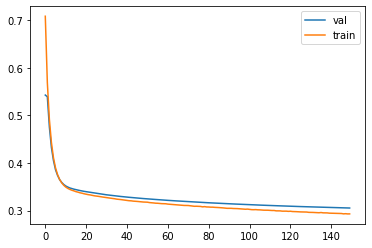

In [4]:
from matplotlib import pyplot as plt
plt.plot(history_cnn.history['val_loss'], label='val')
plt.plot(history_cnn.history['loss'], label='train')
plt.legend()
plt.show()

In [5]:
model.summary()

Model: "keras_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv_0 (Conv2D)              (None, 14, 14, 16)        64        
_________________________________________________________________
bn_conv_0 (BatchNormalizatio (None, 14, 14, 16)        64        
_________________________________________________________________
conv_act_0 (Activation)      (None, 14, 14, 16)        0         
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 7, 7, 16)          0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 6, 6, 16)          1024      
_________________________________________________________________
bn_conv_1 (BatchNormalizatio (None, 6, 6, 16)       

In [6]:
def getCallbacks(outdir_):
    import tensorflow as tf
    callbacks = [
      tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
      tf.keras.callbacks.ModelCheckpoint(filepath=outdir_+'/model_best.h5',monitor="val_loss",verbose=0,save_best_only=True), 
      tf.keras.callbacks.ModelCheckpoint(filepath=outdir_+'/weights_best.h5',monitor="val_loss",verbose=0,save_weights_only=True),
      tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=2, min_lr=1E-6)
    ]

In [7]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_callbacks
from qkeras.autoqkeras.utils import print_qmodel_summary


NSTEPS = int(x_train.shape[0]*0.9)  // 250 #90% train, 10% validation in 10-fold cross validation
NSTEPS = 250
print('Number of training steps per epoch is {}'.format(NSTEPS))

# Prune all convolutional and dense layers gradually from 0 to 50% sparsity every 2 epochs, 
# ending by the 10th epoch
def pruneFunction(layer):
    pruning_params = {'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity = 0.0,
                                                                   final_sparsity = 0.25, 
                                                                   begin_step = NSTEPS*2, 
                                                                   end_step = NSTEPS*10, 
                                                                   frequency = NSTEPS)
                     }
    if isinstance(layer, tf.keras.layers.Conv2D):
        return tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)
    if isinstance(layer, tf.keras.layers.Dense) and layer.name!='output_dense':
        return tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)  
    return layer

model_pruned = tf.keras.models.clone_model( model, clone_function=pruneFunction)

Number of training steps per epoch is 250
Instructions for updating:
Please use `layer.add_weight` method instead.


In [8]:

import time
train =True

if train:
    LOSS        = tf.keras.losses.CategoricalCrossentropy()
    OPTIMIZER   = tf.keras.optimizers.Adam(learning_rate=3E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)

    model_pruned.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=["accuracy"])

    callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1,batch_size=batch_size),
                 pruning_callbacks.UpdatePruningStep()] 

    start = time.time()
    model_pruned.fit(x_train,y_train,epochs = 30,validation_split=0.1,callbacks=callbacks)
                 #validation_data = x_test,
                 #callbacks = callbacks)   
    end = time.time()

    print('It took {} minutes to train Keras model'.format( (end - start)/60.))
    model_pruned.save('pruned_cnn_model.h5')
else:
    from qkeras.utils import _add_supported_quantized_objects
    from tensorflow_model_optimization.python.core.sparsity.keras import pruning_wrapper
    
    co = {}
    _add_supported_quantized_objects(co)
    co['PruneLowMagnitude'] = pruning_wrapper.PruneLowMagnitude
    model_pruned = tf.keras.models.load_model('pruned_cnn_model.h5',custom_objects=co)

Epoch 1/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2999 - accuracy: 0.9149 - val_loss: 0.2811 - val_accuracy: 0.9150
Epoch 2/30
3235/3235 [==============================] - 23s 7ms/step - loss: 0.2707 - accuracy: 0.9194 - val_loss: 0.2822 - val_accuracy: 0.9138
Epoch 3/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2604 - accuracy: 0.9216 - val_loss: 0.2783 - val_accuracy: 0.9180
Epoch 4/30
3235/3235 [==============================] - 23s 7ms/step - loss: 0.2533 - accuracy: 0.9230 - val_loss: 0.2631 - val_accuracy: 0.9146
Epoch 5/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2494 - accuracy: 0.9234 - val_loss: 0.2534 - val_accuracy: 0.9244
Epoch 6/30
3235/3235 [==============================] - 23s 7ms/step - loss: 0.2463 - accuracy: 0.9246 - val_loss: 0.2513 - val_accuracy: 0.9217
Epoch 7/30
3235/3235 [==============================] - 24s 7ms/step - loss: 0.2453 - accuracy: 0.9241 - val_loss: 0.2449 - val_ac

In [9]:
# These are the quantizers we'll test in the bayesian optimization
quantization_config = {
        "kernel": {
                "quantized_bits(2,0,1,alpha=1.0)": 2,
                "quantized_bits(4,0,1,alpha=1.0)": 4,
                "quantized_bits(6,0,1,alpha=1.0)": 6,
                "quantized_bits(8,0,1,alpha=1.0)": 8,
        },
        "bias": {
                "quantized_bits(2,0,1,alpha=1.0)": 2,
                "quantized_bits(4,0,1,alpha=1.0)": 4,
                "quantized_bits(6,0,1,alpha=1.0)": 6,
                "quantized_bits(8,0,1,alpha=1.0)": 8,
        },
        "activation": {
                "quantized_relu(3,1)": 3,
                "quantized_relu(4,2)": 4,
                "quantized_relu(8,2)": 8,
                "quantized_relu(8,4)": 8,
                "quantized_relu(16,6)": 16
        },
        "linear": {
                "quantized_bits(2,0,1,alpha=1.0)": 2,
                "quantized_bits(4,0,1,alpha=1.0)": 4,
                "quantized_bits(6,0,1,alpha=1.0)": 6,
                "quantized_bits(8,0,1,alpha=1.0)": 8,
        }
}

# These are the layer types we will quantize
limit = {
    "Dense": [8, 8, 16],
    "Conv2D": [8, 8, 16],
    "Activation": [16],
}

# Use this if you want to minimize the model bit size
goal_bits = {
    "type": "bits",
          "params": {
              "delta_p": 8.0, # We tolerate up to a +8% accuracy change
              "delta_n": 8.0, # We tolerate down to a -8% accuracy change
              "rate": 2.0,    # We want a x2 times smaller model
              "stress": 1.0,  # Force the reference model size to be smaller by setting stress<1
              "input_bits": 8,
              "output_bits": 8,
              "ref_bits": 8,
              "config": {
                  "default": ["parameters", "activations"]
              }
          }
}

# Use this if you want to minimize the model energy consumption
goal_energy = {
    "type": "energy",
    "params": {
        "delta_p": 8.0,
        "delta_n": 8.0,
        "rate": 2.0,
        "stress": 1.0,
        "process": "horowitz",
        "parameters_on_memory": ["sram", "sram"],
        "activations_on_memory": ["sram", "sram"],
        "rd_wr_on_io": [False, False],
        "min_sram_size": [0, 0],
        "source_quantizers": ["fp32"],
        "reference_internal": "int8",
        "reference_accumulator": "int32"
        }
}

run_config = {
        "goal": goal_bits,
        "quantization_config": quantization_config,
        "learning_rate_optimizer": False,
        "transfer_weights": False, # Randomely initialize weights
        "mode": "bayesian", # This can be bayesian,random,hyperband
        "seed": 42,
        "limit": limit,
        "tune_filters": "layer",
        "tune_filters_exceptions": "^output",
        "distribution_strategy": None,
        "layer_indexes":range(1,len(model.layers) -1),
        "max_trials": 100 # Let's just do 5 trials for this demonstrator, ideally you should do as many as possible
}


In [10]:
from qkeras.autoqkeras import AutoQKeras

autoqk = AutoQKeras(model, output_dir="autoq_cnn", metrics=["acc"], custom_objects={}, **run_config)
autoqk.fit(x_train,y_train, validation_split=0.1, epochs=15)

aqmodel = autoqk.get_best_model()
print_qmodel_summary(aqmodel)   

Trial 100 Complete [00h 05m 35s]
val_score: 1.107082724571228

Best val_score So Far: 1.1109650135040283
Total elapsed time: 09h 05m 41s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


learning_rate: 1.5780000467202626e-05
Model: "keras_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv_0 (QConv2D)             (None, 14, 14, 8)         32        
_________________________________________________________________
bn_conv_0 (BatchNormalizatio (None, 14, 14, 8)         32        
_________________________________________________________________
conv_act_0 (QActivation)     (None, 14, 14, 8)         0         
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
conv_1 (QConv2D)             (None, 6, 6, 8)           256       
_________________________________________________________________
bn_conv_1 (Bat

In [11]:
# This model has some remnants from the optimization procedure attached to it, so let's define a new one
#aqmodel.save_weights("autoqkeras_cnn_weights.h5")
aqmodel.save_weights("autoqkeras_cnn_weights.h5")

layers = [l for l in aqmodel.layers]
x = layers[0].output
for i in range(1, len(layers)):
    x = layers[i](x)

new_model = Model(inputs=[layers[0].input], outputs=[x])   
LOSS        = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER   = tf.keras.optimizers.Adam(learning_rate=3E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)

new_model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=["accuracy"])
new_model.summary()
new_model.load_weights("autoqkeras_cnn_weights.h5")
print_qmodel_summary(new_model)  

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv_0 (QConv2D)             (None, 14, 14, 8)         32        
_________________________________________________________________
bn_conv_0 (BatchNormalizatio (None, 14, 14, 8)         32        
_________________________________________________________________
conv_act_0 (QActivation)     (None, 14, 14, 8)         0         
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
conv_1 (QConv2D)             (None, 6, 6, 8)           256       
_________________________________________________________________
bn_conv_1 (BatchNormalizatio (None, 6, 6, 8)          

In [12]:
predictions_cnn = model.predict(x_test)
predictions_q   = new_model.predict(x_test)
new_model.save('q_cnn.h5')

In [13]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())
fpr1, tpr1, thresholds = roc_curve(y_test.ravel(), predictions_q.ravel())
#fpr2, tpr2, thresholds = roc_curve(y_test.ravel(), predictions_q2.ravel())
#fpr3, tpr3, thresholds = roc_curve(y_test.ravel(), predictions_q3.ravel())



from sklearn.metrics import auc
auc0 = auc(fpr0, tpr0)
auc1 = auc(fpr1, tpr1)

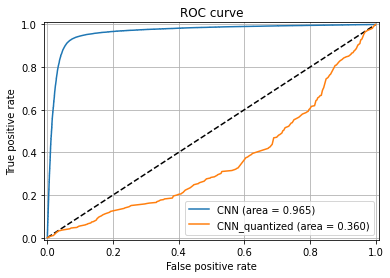

In [14]:
%matplotlib inline
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='CNN (area = {:.3f})'.format(auc0))
plt.plot(fpr1, tpr1, label='CNN_quantized (area = {:.3f})'.format(auc1))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');

In [15]:
import hls4ml
import plotting
#hls4ml.model.optimizer.OutputRoundingSaturationMode.layers = ['Activation']
#hls4ml.model.optimizer.OutputRoundingSaturationMode.rounding_mode = 'AP_RND'
#hls4ml.model.optimizer.OutputRoundingSaturationMode.saturation_mode = 'AP_SAT'

hls_config_aq = hls4ml.utils.config_from_keras_model(new_model, granularity='name')
hls_config_aq['Model']['ReuseFactor'] = 10
hls_config_aq['Model']['Strategy'] = 'Resource'
#for lname,val in hls_config_aq['LayerName'].items():
#    hls_config_aq['LayerName'][lname]['ReuseFactor']=10
#hls_config_aq['Model']['Precision'] = 'ap_fixed<10,2>'
#hls_config_aq['LayerName']['softmax']['Strategy'] = 'Stable'
#plotting.print_dict(hls_config_aq)
  
cfg_aq = hls4ml.converters.create_config(backend='Vivado')
cfg_aq['IOType']     = 'io_parallel' # io_stream Must set this if using CNNs!
cfg_aq['HLSConfig']  = hls_config_aq
cfg_aq['KerasModel'] = new_model
cfg_aq['OutputDir']  = 'autoqkeras_cnn/vu9p_parallel'
cfg_aq['XilinxPart'] = 'xcvu13p-flga2577-2L-e'# A vu13p target. #'xcu250-figd2104-2L-e'
hls_model_aq = hls4ml.converters.keras_to_hls(cfg_aq)
hls_model_aq.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: Input
Layer name: conv_0, layer type: QConv2D
  -> Activation (linear), layer name: conv_0
Layer name: bn_conv_0, layer type: BatchNormalization
Layer name: conv_act_0, layer type: QActivation
  -> Activation (quantized_relu(3,1)), layer name: conv_act_0
Layer name: pool_0, layer type: MaxPooling2D
Layer name: conv_1, layer type: QConv2D
  -> Activation (linear), layer name: conv_1
Layer name: bn_conv_1, layer type: BatchNormalization
Layer name: conv_act_1, layer type: QActivation
  -> Activation (quantized_relu(3,1)), layer name: conv_act_1
Layer name: pool_1, layer type: MaxPooling2D
Layer name: conv_2, layer type: QConv2D
  -> Activation (linear), layer name: conv_2
Layer name: bn_conv_2, layer type: BatchNormalization
Layer name: conv_act_2, layer type: QActivation
  -> Activation (quantized_relu(3,1)), layer name: conv_act_2
Layer name: pool_2, layer type: MaxPooling2D
Layer name: dense_0, layer type: QDense
  -> Activ

In [16]:
from keras.models import model_from_json
json_model = new_model.to_json()
with open('autoQKeras_cnn.json','w') as aFile:
    aFile.write(json_model)

Using TensorFlow backend.


In [17]:
y_predict_aq        = aqmodel.predict(x_test)
y_predict_hls4ml_aq = hls_model_aq.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_keras  = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict_aq,axis=1)))
accuracy_hls4ml = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict_hls4ml_aq,axis=1)))

print("Accuracy AutoQ Keras:  {}".format(accuracy_keras))
print("Accuracy AutoQ hls4ml: {}".format(accuracy_hls4ml))

Accuracy AutoQ Keras:  0.386076114458617
Accuracy AutoQ hls4ml: 0.8756814565563293


In [19]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())
fpr1, tpr1, thresholds = roc_curve(y_test.ravel(), predictions_q.ravel())
fpr2, tpr2, thresholds = roc_curve(y_test.ravel(), y_predict_hls4ml_aq.ravel())

In [20]:
from sklearn.metrics import auc
auc0 = auc(fpr0, tpr0)
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

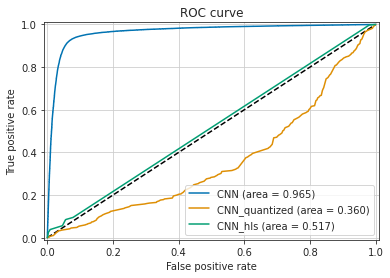

In [21]:
%matplotlib inline
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='CNN (area = {:.3f})'.format(auc0))
plt.plot(fpr1, tpr1, label='CNN_quantized (area = {:.3f})'.format(auc1))
plt.plot(fpr2, tpr2, label='CNN_hls (area = {:.3f})'.format(auc2))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');
plt.savefig('qgTaggerPerformance.png')

In [22]:
import os
os.environ['PATH'] = '/tools/Xilinx/Vivado/2018.3/bin:' + os.environ['PATH']
synth = True
if synth:
    hls_model_aq.build(csim=False, synth=True, vsynth=True)
    data_autoq = getReports('autoqkeras_cnn/vu9p_parallel')

    print("\n Resource usage and latency: AutoQ")
    pprint.pprint(data_autoq)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.3 (64-bit)
  **** SW Build 2405991 on Thu Dec  6 23:36:41 MST 2018
  **** IP Build 2404404 on Fri Dec  7 01:43:56 MST 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2018.3/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2018.3/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'rnarayan' on host 'gpu1' (Linux_x86_64 version 3.10.0-1160.66.1.el7.x86_64) on Fri Jan 13 08:19:56 CST 2023
INFO: [HLS 200-10] On os "CentOS Linux release 7.9.2009 (Core)"
INFO: [HLS 200-10] In directory '/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel'
INFO: [HLS 200-10] Opening project '/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test be

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:32 ; elapsed = 00:00:33 . Memory (MB): peak = 722.734 ; gain = 197.555 ; free physical = 2789 ; free virtual = 87970
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [XFORM 203-602] Inlining function 'nnet::cast<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2_mult>' into 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' (firmware/nnet_utils/nnet_conv2d_resource.h:97->firmware/nnet_utils/nnet_conv2d.h:73) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:14) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)

INFO: [HLS 200-111] Finished Checking Synthesizability Time (s): cpu = 00:00:36 ; elapsed = 00:00:38 . Memory (MB): peak = 722.734 ; gain = 197.555 ; free physical = 2742 ; free virtual = 87923
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::softmax_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, softmax_config28>' (firmware/nnet_utils/nnet_activation.h:204:45).
INFO: [XFORM 203-502] Unrolling small iteration loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:64) in function 'nnet::dense_resource<ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config26>' automatically.
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config25>' (firmware/nnet_utils/nnet_activation.h:66:39).
INFO: [XFORM 203-502] Unrolling all loops f

INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_resource.h:98) in function 'nnet::dense_resource<ap_ufixed<8, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config22>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:69) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<8, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config21>' completely with a factor of 21.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_batchnorm.h:77) in function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>' completely with a factor of 21.
INFO: [HLS 200-489] Unrolling loop 'InitAccum' (firmware/nnet_utils/nnet_dense_resource.h:58) in function 'nnet::dense_resource<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, con

INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_pooling.h:13) in function 'nnet::max<ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, 4>' completely with a factor of 3.
INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:69) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<3, 1, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config5>' completely with a factor of 1568.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_batchnorm.h:77) in function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>' completely with a factor of 1568.
INFO: [HLS 200-489] Unrolling loop 'InitAccumLoop' (firmware/nnet_utils/nnet_conv2d_resource.h:46) in function 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' completely with a factor of 8.
INFO: [HLS 200-489] Unrolling loo

INFO: [XFORM 203-602] Inlining function 'nnet::cast<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2_mult>' into 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' (firmware/nnet_utils/nnet_conv2d_resource.h:97->firmware/nnet_utils/nnet_conv2d.h:73) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:14) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:17) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0' at call site (firmware/myproject.cpp:137) by setting 'scale[5].V' to 's24.V.5'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:137) by setting 'scale[6].V' to 's24.V.6'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_f

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:137) by setting 'bias[0].V' to 'b24.V.0'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:137) by setting 'bias[27].V' to 'b24.V.27'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config24>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:125) by setting 'bias[6].V' to 'b20.V.6'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmw

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:109) by setting 'scale[10].V' to 's14.V.10'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:1) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config14>.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:109) by setting 'scale[11].V' to 's14.V.11'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:93) by setting 'bias[2].V' to 'b9.V.2'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:93) by setting 'bias[3].V' to 'b9.V.3'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_

INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:77) by setting 'bias[5].V' to 'b4.V.5'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_batchnorm.h:14:25) to 'nnet::normalize<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/myproject.cpp:77) by setting 'bias[6].V' to 'b4.V.6'.
INFO: [XFORM 203-622] Instantiating function 'nnet::normal

INFO: [XFORM 203-11] Balancing expressions in function 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' (firmware/nnet_utils/nnet_conv2d_resource.h:36:13)...3 expression(s) balanced.
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::conv_2d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config12>' (firmware/nnet_utils/nnet_conv2d_resource.h:36:64)...242 expression(s) balanced.
INFO: [HLS 200-111] Finished Pre-synthesis Time (s): cpu = 00:31:47 ; elapsed = 00:31:53 . Memory (MB): peak = 4285.195 ; gain = 3760.016 ; free physical = 858 ; free virtual = 84975
INFO: [XFORM 203-531] Rewinding loop 'PartitionLoop' (firmware/nnet_utils/nnet_conv2d_resource.h:36) in function 'conv_2d_cl<ap_fixed,ap_fixed<16,6,5,3,0>,config7>'.
INFO: [XFORM 203-531] Rewinding loop 'PartitionLoop' (firmware/nnet_utils/nnet_conv2d_resource.h:36) in function 'conv_2d_cl<ap_fixe

INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 03:59:42 ; elapsed = 04:00:14 . Memory (MB): peak = 6093.180 ; gain = 5568.000 ; free physical = 404 ; free virtual = 82753
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'fill_buffer_1' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'fill_buffer.1'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 10.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 14420.8 seconds; current allocated memory: 1.344 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sha

   between 'store' operation (firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73) of variable 'data_buf[0][3].V', firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73 on local variable 'data_buf[0][3].V' and 'load' operation ('data_buf_0_3_V_1_load') on local variable 'data_buf[0][3].V'.
   between 'store' operation (firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73) of variable 'data_buf[0][3].V', firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73 on local variable 'data_buf[0][3].V' and 'load' operation ('data_buf_0_3_V_1_load') on local variable 'data_buf[0][3].V'.
   between 'store' operation (firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73) of variable 'data_buf[0][3].V', firmware/nnet_utils/nnet_conv2d_resource.h:36->firmware/nnet_utils/nnet_conv2d.h:73 on local variable 'data_buf[0][3].V' and 'load' operation ('dat

INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 2, Depth = 6.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 43.99 seconds; current allocated memory: 3.086 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 148.13 seconds; current allocated memory: 3.134 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'normalize.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'.
INFO: [SCHED 204-61] Pipelining result : Target II 

INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 4.62 seconds; current allocated memory: 3.191 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 5.36 seconds; current allocated memory: 3.192 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'normalize.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0..1'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 1.
INFO: [SCHED 

INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 1031.33 seconds; current allocated memory: 67.494 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'fill_buffer_1' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-104] Estimated max fanout for 'fill_buffer_1' is 50874 from HDL expression: ((1'b1 == ap_ce_reg) & (1'b0 == ap_block_pp0_stage0_11001))
INFO: [RTGEN 206-100] Finished creating RTL model for 'fill_buffer_1'.
INFO: [HLS 200-111]  Elapsed time: 371.61 seconds; current allocated memory: 312.344 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-104] Estimated max

INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_ap_fixed_ap_ufixed_3_1_5_3_0_relu_config15_s'.
INFO: [HLS 200-111]  Elapsed time: 54.17 seconds; current allocated memory: 1.332 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'pooling2d_cl_ap_ufixed_ap_fixed_16_6_5_3_0_config16_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Generating core module 'myproject_mux_42_3_1_1': 24 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'pooling2d_cl_ap_ufixed_ap_fixed_16_6_5_3_0_config16_s'.
INFO: [HLS 200-111]  Elapsed time: 50.99 seconds; current allocated memory: 1.338 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_resource_ap_fixed_ap_fixed_16_6_5_3_0_config18_s' 
INFO: [HLS 200-10] -----------------------------------------

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_19_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_20_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_21_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_22_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_23_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_24_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_25_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_26_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_27_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_28_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_111_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_112_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_113_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_114_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_115_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_116_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_117_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_118_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_119_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_120_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_198_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_199_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_200_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_201_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_202_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_203_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_204_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_205_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_206_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_207_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_288_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_289_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_290_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_291_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_292_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_293_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_294_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_295_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_296_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_297_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_377_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_378_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_379_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_380_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_381_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_382_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_383_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_384_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_385_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_386_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_465_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_466_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_467_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_468_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_469_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_470_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_471_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_472_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_473_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_474_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_551_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_552_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_553_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_554_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_555_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_556_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_557_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_558_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_559_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_560_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_636_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_637_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_638_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_639_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_640_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_641_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_642_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_643_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_644_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_645_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_723_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_724_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_725_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_726_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_727_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_728_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_729_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_730_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_731_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_732_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_807_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_808_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_809_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_810_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_811_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_812_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_813_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_814_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_815_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_816_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_891_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_892_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_893_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_894_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_895_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_896_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_897_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_898_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_899_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_900_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_975_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_976_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_977_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_978_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_979_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_980_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_981_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_982_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_983_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_984_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1059_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1060_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1061_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1062_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1063_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1064_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1065_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1066_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1067_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1068_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1143_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1144_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1145_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1146_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1147_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1148_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1149_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1150_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1151_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1152_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1227_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1228_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1229_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1230_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1231_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1232_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1233_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1234_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1235_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1236_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1311_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1312_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1313_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1314_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1315_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1316_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1317_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1318_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1319_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1320_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1394_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1395_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1396_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1397_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1398_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1399_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1400_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1401_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1402_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1403_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1478_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1479_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1480_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1481_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1482_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1483_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1484_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1485_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1486_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1487_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1562_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1563_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1564_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1565_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1566_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_1567_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_0_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_2_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_3_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] I

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_80_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_81_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_82_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_83_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_84_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_85_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_86_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_87_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_88_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_89_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_164_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_165_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_166_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_167_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_168_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_169_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_170_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_171_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_172_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_173_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_248_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_249_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_250_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_251_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_252_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_253_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_254_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_255_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_256_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_257_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_332_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_333_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_334_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_335_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_336_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_337_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_338_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_339_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_340_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_341_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_416_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_417_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_418_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_419_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_420_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_421_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_422_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_423_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_424_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_425_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_500_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_501_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_502_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_503_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_504_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_505_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_506_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_507_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_508_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_509_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_584_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_585_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_586_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_587_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_588_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_589_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_590_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_591_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_592_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_593_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_668_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_669_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_670_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_671_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_672_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_673_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_674_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_675_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_676_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_677_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_753_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_754_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_755_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_756_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_757_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_758_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_759_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_760_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_761_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_762_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_838_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_839_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_840_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_841_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_842_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_843_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_844_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_845_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_846_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_847_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_923_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_924_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_925_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_926_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_927_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_928_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_929_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_930_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_931_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_932_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1007_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1008_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1009_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1010_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1011_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1012_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1013_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1014_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1015_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1016_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1090_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1091_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1092_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1093_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1094_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1095_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1096_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1097_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1098_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1099_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1173_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1174_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1175_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1176_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1177_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1178_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1179_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1180_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1181_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1182_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1257_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1258_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1259_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1260_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1261_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1262_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1263_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1264_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1265_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1266_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1340_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1341_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1342_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1343_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1344_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1345_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1346_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1347_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1348_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1349_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1423_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1424_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1425_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1426_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1427_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1428_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1429_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1430_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1431_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1432_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1506_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1507_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1508_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1509_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1510_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1511_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1512_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1513_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1514_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_1515_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTM

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_22_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_23_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_24_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_25_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_26_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_27_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_28_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_29_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_30_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_31_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO '

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_108_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_109_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_110_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_111_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_112_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_113_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_114_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_115_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_116_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_117_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_193_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_194_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_195_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_196_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_197_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_198_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_199_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_200_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_201_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_202_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_278_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_279_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_280_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_281_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_282_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_283_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_284_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_285_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_286_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_287_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_363_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_364_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_365_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_366_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_367_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_368_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_369_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_370_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_371_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_372_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_448_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_449_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_450_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_451_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_452_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_453_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_454_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_455_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_456_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_457_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_533_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_534_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_535_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_536_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_537_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_538_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_539_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_540_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_541_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_542_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_618_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_619_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_620_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_621_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_622_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_623_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_624_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_625_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_626_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_627_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_703_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_704_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_705_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_706_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_707_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_708_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_709_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_710_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_711_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_712_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_788_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_789_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_790_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_791_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_792_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_793_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_794_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_795_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_796_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_797_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_873_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_874_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_875_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_876_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_877_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_878_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_879_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_880_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_881_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_882_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_958_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_959_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_960_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_961_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_962_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_963_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_964_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_965_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_966_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_967_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1043_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1044_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1045_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1046_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1047_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1048_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1049_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1050_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1051_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1052_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1127_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1128_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1129_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1130_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1131_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1132_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1133_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1134_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1135_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1136_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1211_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1212_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1213_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1214_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1215_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1216_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1217_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1218_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1219_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1220_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1295_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1296_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1297_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1298_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1299_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1300_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1301_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1302_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1303_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1304_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1379_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1380_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1381_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1382_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1383_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1384_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1385_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1386_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1387_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1388_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1463_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1464_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1465_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1466_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1467_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1468_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1469_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1470_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1471_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1472_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1547_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1548_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1549_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1550_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1551_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1552_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1553_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1554_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1555_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_1556_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_64_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_65_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_66_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_67_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_68_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_69_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_70_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_71_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_72_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_73_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_148_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_149_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_150_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_151_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_152_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_153_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_154_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_155_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_156_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_157_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_232_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_233_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_234_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_235_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_236_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_237_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_238_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_239_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_240_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_241_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_316_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_317_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_318_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_319_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_320_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_321_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_322_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_323_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_324_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_325_V_U(fifo_w11_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_8_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_9_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_10_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_11_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_12_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_13_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_14_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_15_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_16_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_17_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementin

INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_93_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_94_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_95_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_96_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_97_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_98_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_99_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_100_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_101_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_102_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implem

INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_177_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_178_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_179_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_180_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_181_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_182_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_183_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_184_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_185_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_186_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_261_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_262_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_263_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_264_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_265_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_266_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_267_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_268_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_269_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_270_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_58_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_59_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_60_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_61_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_62_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_63_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_64_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_65_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_66_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_67_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_143_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_144_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_145_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_146_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_147_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_148_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_149_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_150_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_151_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_152_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_227_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_228_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_229_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_230_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_231_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_232_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_233_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_234_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_235_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer9_out_236_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_23_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_24_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_25_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_26_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_27_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_28_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_29_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_30_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_31_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_32_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_108_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_109_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_110_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_111_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_112_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_113_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_114_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_115_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_116_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_117_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_192_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_193_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_194_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_195_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_196_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_197_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_198_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_199_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_200_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_201_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_276_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_277_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_278_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_279_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_280_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_281_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_282_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_283_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_284_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer10_out_285_V_U(fifo_w3_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_0_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_1_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_2_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_3_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_4_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_5_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_6_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_7_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_8_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer12_out_9_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_36_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_37_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_38_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_39_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_40_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_41_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_42_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_43_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_44_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer14_out_45_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_13_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_14_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_15_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_16_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_17_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_18_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_19_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_20_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer20_out_0_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer20_out_1_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] I

INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_3_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_4_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_5_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_6_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_7_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_8_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_9_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_10_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_11_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer24_out_12_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implem

INFO: [Synth 8-3491] module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s' declared at '/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s.vhd:12' bound to instance 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_U0' of component 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/myproject.vhd:57635]
INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s.vhd:1594]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s.vhd:3194]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/hom

INFO: [Synth 8-256] done synthesizing module 'pooling2d_cl_ap_ufixed_ap_fixed_16_6_5_3_0_config6_s' (7#1) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/pooling2d_cl_ap_ufixed_ap_fixed_16_6_5_3_0_config6_s.vhd:1984]
INFO: [Synth 8-3491] module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config7_s' declared at '/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config7_s.vhd:12' bound to instance 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config7_U0' of component 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config7_s' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/myproject.vhd:67477]
INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config7_s' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config7_s.vhd:704]
INFO: [Synth 8-5534] Detected att

INFO: [Synth 8-256] done synthesizing module 'pooling2d_cl_ap_ufixed_ap_fixed_16_6_5_3_0_config11_s' (12#1) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/pooling2d_cl_ap_ufixed_ap_fixed_16_6_5_3_0_config11_s.vhd:384]
INFO: [Synth 8-3491] module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_s' declared at '/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_s.vhd:12' bound to instance 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_U0' of component 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_s' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/myproject.vhd:69709]
INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_s' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_s.vhd:144]
INFO: [Synth 8-5534] Dete

	Parameter din17_WIDTH bound to: 16 - type: integer 
	Parameter din18_WIDTH bound to: 16 - type: integer 
	Parameter din19_WIDTH bound to: 16 - type: integer 
	Parameter din20_WIDTH bound to: 16 - type: integer 
	Parameter din21_WIDTH bound to: 16 - type: integer 
	Parameter din22_WIDTH bound to: 16 - type: integer 
	Parameter din23_WIDTH bound to: 16 - type: integer 
	Parameter din24_WIDTH bound to: 16 - type: integer 
	Parameter din25_WIDTH bound to: 16 - type: integer 
	Parameter din26_WIDTH bound to: 16 - type: integer 
	Parameter din27_WIDTH bound to: 16 - type: integer 
	Parameter din28_WIDTH bound to: 16 - type: integer 
	Parameter din29_WIDTH bound to: 16 - type: integer 
	Parameter din30_WIDTH bound to: 16 - type: integer 
	Parameter din31_WIDTH bound to: 16 - type: integer 
	Parameter din32_WIDTH bound to: 16 - type: integer 
	Parameter din33_WIDTH bound to: 16 - type: integer 
	Parameter din34_WIDTH bound to: 16 - type: integer 
	Parameter din35_WIDTH bound to: 16 - type: in

	Parameter ID bound to: 1 - type: integer 
	Parameter NUM_STAGE bound to: 1 - type: integer 
	Parameter din0_WIDTH bound to: 1 - type: integer 
	Parameter din1_WIDTH bound to: 1 - type: integer 
	Parameter din2_WIDTH bound to: 1 - type: integer 
	Parameter din3_WIDTH bound to: 1 - type: integer 
	Parameter din4_WIDTH bound to: 1 - type: integer 
	Parameter din5_WIDTH bound to: 1 - type: integer 
	Parameter din6_WIDTH bound to: 1 - type: integer 
	Parameter din7_WIDTH bound to: 1 - type: integer 
	Parameter din8_WIDTH bound to: 1 - type: integer 
	Parameter din9_WIDTH bound to: 1 - type: integer 
	Parameter din10_WIDTH bound to: 1 - type: integer 
	Parameter din11_WIDTH bound to: 1 - type: integer 
	Parameter din12_WIDTH bound to: 1 - type: integer 
	Parameter din13_WIDTH bound to: 1 - type: integer 
	Parameter din14_WIDTH bound to: 1 - type: integer 
	Parameter din15_WIDTH bound to: 1 - type: integer 
	Parameter din16_WIDTH bound to: 1 - type: integer 
	Parameter din17_WIDTH bound to: 

	Parameter ID bound to: 1 - type: integer 
	Parameter NUM_STAGE bound to: 1 - type: integer 
	Parameter din0_WIDTH bound to: 1 - type: integer 
	Parameter din1_WIDTH bound to: 1 - type: integer 
	Parameter din2_WIDTH bound to: 1 - type: integer 
	Parameter din3_WIDTH bound to: 1 - type: integer 
	Parameter din4_WIDTH bound to: 1 - type: integer 
	Parameter din5_WIDTH bound to: 1 - type: integer 
	Parameter din6_WIDTH bound to: 1 - type: integer 
	Parameter din7_WIDTH bound to: 1 - type: integer 
	Parameter din8_WIDTH bound to: 1 - type: integer 
	Parameter din9_WIDTH bound to: 1 - type: integer 
	Parameter din10_WIDTH bound to: 1 - type: integer 
	Parameter din11_WIDTH bound to: 1 - type: integer 
	Parameter din12_WIDTH bound to: 1 - type: integer 
	Parameter din13_WIDTH bound to: 1 - type: integer 
	Parameter din14_WIDTH bound to: 1 - type: integer 
	Parameter din15_WIDTH bound to: 1 - type: integer 
	Parameter din16_WIDTH bound to: 1 - type: integer 
	Parameter din17_WIDTH bound to: 

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_s' (16#1) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/conv_2d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config12_s.vhd:144]
INFO: [Synth 8-638] synthesizing module 'normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0.vhd:120]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0.vhd:132]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0.vhd:135]
INFO: [Synth 8-256] done synthesizing module 'normalize_0_

INFO: [Synth 8-256] done synthesizing module 'dense_resource_ap_fixed_ap_fixed_16_6_5_3_0_config18_s' (20#1) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/dense_resource_ap_fixed_ap_fixed_16_6_5_3_0_config18_s.vhd:57]
INFO: [Synth 8-638] synthesizing module 'normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1.vhd:66]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1.vhd:78]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1.vhd:81]
INFO: [Synth 8-256] done synthesizing 

INFO: [Synth 8-256] done synthesizing module 'myproject_mac_muladd_3ns_8ns_10ns_11_1_1' (31#1) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/myproject_mac_muladd_3ns_8ns_10ns_11_1_1.vhd:59]
	Parameter ID bound to: 1 - type: integer 
	Parameter NUM_STAGE bound to: 1 - type: integer 
	Parameter din0_WIDTH bound to: 3 - type: integer 
	Parameter din1_WIDTH bound to: 7 - type: integer 
	Parameter din2_WIDTH bound to: 9 - type: integer 
	Parameter dout_WIDTH bound to: 10 - type: integer 
	Parameter ID bound to: 1 - type: integer 
	Parameter NUM_STAGE bound to: 1 - type: integer 
	Parameter din0_WIDTH bound to: 3 - type: integer 
	Parameter din1_WIDTH bound to: 8 - type: integer 
	Parameter din2_WIDTH bound to: 8 - type: integer 
	Parameter dout_WIDTH bound to: 10 - type: integer 
INFO: [Synth 8-638] synthesizing module 'myproject_mac_muladd_3ns_8ns_8ns_10_1_1' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/myprojec

INFO: [Synth 8-256] done synthesizing module 'dense_resource_ap_ufixed_ap_fixed_config26_s' (46#1) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/dense_resource_ap_ufixed_ap_fixed_config26_s.vhd:58]
INFO: [Synth 8-638] synthesizing module 'softmax_latency_ap_fixed_ap_fixed_softmax_config28_s' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s.vhd:30]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s.vhd:46]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s.vhd:49]
	Parameter DataWidth bound to: 17 - type: integer 
	Parameter AddressRange bound to: 1024 - ty

INFO: [Synth 8-638] synthesizing module 'fifo_w11_d2_A' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/fifo_w11_d2_A.vhd:69]
	Parameter MEM_STYLE bound to: shiftreg - type: string 
	Parameter DATA_WIDTH bound to: 11 - type: integer 
	Parameter ADDR_WIDTH bound to: 1 - type: integer 
	Parameter DEPTH bound to: 2 - type: integer 
	Parameter DATA_WIDTH bound to: 11 - type: integer 
	Parameter ADDR_WIDTH bound to: 1 - type: integer 
	Parameter DEPTH bound to: 2 - type: integer 
INFO: [Synth 8-638] synthesizing module 'fifo_w11_d2_A_shiftReg' [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/fifo_w11_d2_A.vhd:26]
	Parameter DATA_WIDTH bound to: 11 - type: integer 
	Parameter ADDR_WIDTH bound to: 1 - type: integer 
	Parameter DEPTH bound to: 2 - type: integer 
INFO: [Synth 8-256] done synthesizing module 'fifo_w11_d2_A_shiftReg' (58#1) [/home/rnarayan/hls4ml/autoqkeras_cnn/vu9p_parallel/myproject_prj/solution1/syn/vhdl/

INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-5544] ROM "ap_NS_fsm" won't be mapped to Block RAM because address size (1) smaller than threshold (5)
INFO: [Synth 8-5544] ROM "ap_NS_fsm" won't be mapped to Block RAM because address size (1) smaller than threshold (5)
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-5544] ROM "ap_NS_fsm" won't be mapped to Block RAM because address size (1) smaller than threshold (5)
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-5544] ROM "ap_NS_fsm" won't be mapped to Block RAM because address size (1) smaller than threshold (5)
INFO: [Synth 8-5544] ROM "ap_NS_fsm" won't 

Detailed RTL Component Info : 
+---Adders : 
	   3 Input     26 Bit       Adders := 1957  
	   2 Input     18 Bit       Adders := 1     
	   2 Input     16 Bit       Adders := 16    
	   4 Input     16 Bit       Adders := 19    
	   9 Input     16 Bit       Adders := 2     
	   3 Input     16 Bit       Adders := 18    
	   7 Input     16 Bit       Adders := 10    
	  10 Input     16 Bit       Adders := 3     
	  11 Input     16 Bit       Adders := 5     
	   6 Input     16 Bit       Adders := 5     
	  14 Input     16 Bit       Adders := 2     
	   5 Input     16 Bit       Adders := 10    
	   8 Input     16 Bit       Adders := 3     
	   3 Input     15 Bit       Adders := 17    
	   2 Input     15 Bit       Adders := 57    
	   4 Input     15 Bit       Adders := 3     
	   5 Input     15 Bit       Adders := 1     
	   2 Input     14 Bit       Adders := 60    
	   3 Input     14 Bit       Adders := 1     
	   4 Input     14 Bit       Adders := 1     
	   2 Input     13 Bit       Adders

Detailed RTL Component Info : 
+---Registers : 
	               11 Bit    Registers := 2     
+---Muxes : 
	   2 Input     11 Bit        Muxes := 1     
Module fifo_w11_d2_A__83 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w11_d2_A_shiftReg__84 
Detailed RTL Component Info : 
+---Registers : 
	               11 Bit    Registers := 2     
+---Muxes : 
	   2 Input     11 Bit        Muxes := 1     
Module fifo_w11_d2_A__84 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w3_d2_A_shiftReg__81 
Detailed RTL Component Info : 
+---Registers : 
	      

	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w3_d2_A_shiftReg__445 
Detailed RTL Component Info : 
+---Registers : 
	                3 Bit    Registers := 2     
+---Muxes : 
	   2 Input      3 Bit        Muxes := 1     
Module fifo_w3_d2_A__445 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w3_d2_A_shiftReg__446 
Detailed RTL Component Info : 
+---Registers : 
	                3 Bit    Registers := 2     
+---Muxes : 
	   2 Input      3 Bit        Muxes := 1     
Module fifo_w3_d2_A__446 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxe

	   2 Input      1 Bit        Muxes := 3     
Module fifo_w3_d2_A_shiftReg__1239 
Detailed RTL Component Info : 
+---Registers : 
	                3 Bit    Registers := 2     
+---Muxes : 
	   2 Input      3 Bit        Muxes := 1     
Module fifo_w3_d2_A__1239 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w3_d2_A_shiftReg__1240 
Detailed RTL Component Info : 
+---Registers : 
	                3 Bit    Registers := 2     
+---Muxes : 
	   2 Input      3 Bit        Muxes := 1     
Module fifo_w3_d2_A__1240 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Modu

	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__516 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__516 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__517 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__517 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---

	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__1021 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__1021 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__1022 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__1022 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     


Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__1738 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__1739 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__1739 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__1740 
Detailed RTL Component Info : 
+---Registers :

	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__2471 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__2471 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d2_A_shiftReg__2472 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 2     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
Module fifo_w16_d2_A__2472 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



No constraint files found.
---------------------------------------------------------------------------------
Start Cross Boundary and Area Optimization
---------------------------------------------------------------------------------
INFO: [Synth 8-3333] propagating constant 1 across sequential element (\ap_CS_fsm_reg[0] )
INFO: [Common 17-14] Message 'Synth 8-5546' appears 100 times and further instances of the messages will be disabled. Use the Tcl command set_msg_config to change the current settings.
INFO: [Common 17-14] Message 'Synth 8-5546' appears 100 times and further instances of the messages will be disabled. Use the Tcl command set_msg_config to change the current settings.
INFO: [Synth 8-5544] ROM "data20" won't be mapped to Block RAM because address size (1) smaller than threshold (5)
INFO: [Common 17-14] Message 'Synth 8-5546' appears 100 times and further instances of the messages will be disabled. Use the Tcl command set_msg_config to change the current settings.
INFO:

DSP Report: Generating DSP r_V_2_reg_260_reg, operation Mode is: (A2*B'')'.
DSP Report: register B is absorbed into DSP r_V_2_reg_260_reg.
DSP Report: register B is absorbed into DSP r_V_2_reg_260_reg.
DSP Report: register inv_exp_sum_V_reg_255_reg is absorbed into DSP r_V_2_reg_260_reg.
DSP Report: register r_V_2_reg_260_reg is absorbed into DSP r_V_2_reg_260_reg.
DSP Report: operator myproject_mul_mul_18s_17ns_26_1_1_U7050/myproject_mul_mul_18s_17ns_26_1_1_DSP48_10_U/p_cvt is absorbed into DSP r_V_2_reg_260_reg.
DSP Report: Generating DSP r_V_2_1_reg_265_reg, operation Mode is: (A2*B'')'.
DSP Report: register B is absorbed into DSP r_V_2_1_reg_265_reg.
DSP Report: register B is absorbed into DSP r_V_2_1_reg_265_reg.
DSP Report: register inv_exp_sum_V_reg_255_reg is absorbed into DSP r_V_2_1_reg_265_reg.
DSP Report: register r_V_2_1_reg_265_reg is absorbed into DSP r_V_2_1_reg_265_reg.
DSP Report: operator myproject_mul_mul_18s_17ns_26_1_1_U7051/myproject_mul_mul_18s_17ns_26_1_1_DSP48

INFO: [Synth 8-6837] The timing for the instance i_2/softmax_latency_ap_fixed_ap_fixed_softmax_config28_U0/i_0/exp_table1_U/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s_exp_bkb_rom_U/q1_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the block ram. Providing additional output register may help in improving timing.
INFO: [Synth 8-6837] The timing for the instance i_2/softmax_latency_ap_fixed_ap_fixed_softmax_config28_U0/i_1/exp_table1_U/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s_exp_bkb_rom_U/q0_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the block ram. Providing additional output register may help in improving timing.
INFO: [Synth 8-6837] The timing for the instance i_2/softmax_latency_ap_fixed_ap_fixed_softmax_config28_U0/i_2/invert_table2_U/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s_invecud_rom_U/q0_reg (implemented as a Block RAM) might 

---------------------------------------------------------------------------------
Finished Timing Optimization : Time (s): cpu = 00:45:01 ; elapsed = 00:46:08 . Memory (MB): peak = 17019.023 ; gain = 15558.629 ; free physical = 6029 ; free virtual = 48328
---------------------------------------------------------------------------------

Report RTL Partitions: 
+------+---------------------------------------------------------+------------+----------+
|      |RTL Partition                                            |Replication |Instances |
+------+---------------------------------------------------------+------------+----------+
|1     |srl_fill_buffer_1                                        |           1|      3888|
|2     |fill_buffer_1__GB1                                       |           1|      2699|
|3     |fill_buffer_1__GB2                                       |           1|     14693|
|4     |fill_buffer_1__GB3                                       |           1|     17172|


INFO: [Synth 8-6837] The timing for the instance i_2/softmax_latency_ap_fixed_ap_fixed_softmax_config28_U0/invert_table2_U/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s_invecud_rom_U/q0_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the block ram. Providing additional output register may help in improving timing.
---------------------------------------------------------------------------------
Finished Technology Mapping : Time (s): cpu = 04:32:50 ; elapsed = 04:34:12 . Memory (MB): peak = 17027.027 ; gain = 15566.633 ; free physical = 39142 ; free virtual = 52053
---------------------------------------------------------------------------------

Report RTL Partitions: 
+------+---------------------------------------------------------+------------+----------+
|      |RTL Partition                                            |Replication |Instances |
+------+---------------------------------------------------------+--------

---------------------------------------------------------------------------------
Start IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Final Netlist Cleanup
---------------------------------------------------------------------------------
INFO: [Synth 8-6837] The timing for the instance softmax_latency_ap_fixed_ap_fixed_softmax_config28_U0/invert_table2_U/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s_invecud_rom_U/q0_reg (implemented as a Block RAM


Report Instance Areas: 
+------+-------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|      |Instance                                                                 |Module                                                                                                                                                      |Cells   |
+------+-------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|1     |top                                                                      |                                                                                                                                                  

|3910  |  layer2_out_713_V_U                                                     |fifo_w16_d2_A_1922                                                                                                                                          |     105|
|3911  |    U_fifo_w16_d2_A_shiftReg                                             |fifo_w16_d2_A_shiftReg_10763                                                                                                                                |      94|
|3912  |  layer2_out_714_V_U                                                     |fifo_w16_d2_A_1923                                                                                                                                          |     105|
|3913  |    U_fifo_w16_d2_A_shiftReg                                             |fifo_w16_d2_A_shiftReg_10762                                                                                                                                |      94|
|391

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Synthesis Optimization Runtime : Time (s): cpu = 05:28:35 ; elapsed = 05:30:28 . Memory (MB): peak = 17027.027 ; gain = 15566.633 ; free physical = 43170 ; free virtual = 57101
Synthesis Optimization Complete : Time (s): cpu = 05:28:35 ; elapsed = 05:30:28 . Memory (MB): peak = 17027.027 ; gain = 15566.633 ; free physical = 43271 ; free virtual = 57102
INFO: [Project 1-571] Translating synthesized netlist
INFO: [Netlist 29-17] Analyzing 14180 Unisim elements for replacement
INFO: [Netlist 29-28] Unisim Transformation completed in 6 CPU seconds
INFO: [Project 1-570] Preparing netlist for logic optimization
INFO: [Opt 31-138] Pushed 0 inverter(s) to 0 load pin(s).
INFO: [Opt 31-422] The CLOCK_DOMAINS attribute on the BRAM cell softmax_latency_ap_fixed_ap_fixed_softmax_config28_U0/exp_table1_U/softmax_latency_ap_fixed_ap_fixed_softmax_config28_s_exp_bkb_rom_U/q1_reg has been changed from INDEPENDENT to COMMON to match the clocking topology used for the BRAM.
Netlist sorting complete. Time

NameError: name 'getReports' is not defined